# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 599
['grytviken', 'blackmans bay', 'gadzhiyevo', 'turochak', 'pleszew', 'fortuna', 'bardai', 'bredasdorp', 'lastoursville', 'kulia village', 'hawaiian paradise park', 'daru', "kargopol'", 'waitangi', 'papatowai', 'arraial do cabo', 'rio gallegos', 'taiohae', 'hasaki', 'adamstown', 'nuuk', 'anadyr', "nar'yan-mar", 'yellowknife', 'port-aux-francais', "st. john's", 'isafjordur', 'sonsorol village', 'varennes-vauzelles', 'mwandiga', 'weno', 'west island', 'puerto quijarro', 'manakara', 'medenine', 'sidareja', "severobaykal'sk", 'qarqaraly', 'viedma', 'kununurra', 'georgetown', 'luderitz', 'longyearbyen', 'toga village', 'al kharijah', 'uzice', 'lago da pedra', 'nemuro', 'edinburgh of the seven seas', 'lebu', 'mali', 'zinjibar', 'zarghun shahr', 'imam qasim', 'sechenovo', 'rongelap', 'kembe', 'ushuaia', 'aasiaat', 'marsh harbour', 'hamilton', 'fayroz koh', 'olonkinbyen', 'invercargill', 'howrah', 'tandil', 'lompoc', 'aban', 'nova sintra', 'san bernardo del vien

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (response['weather'][0])

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | gadzhiyevo
Processing Record 4 of Set 1 | turochak
Processing Record 5 of Set 1 | pleszew
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | bardai
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | lastoursville
Processing Record 10 of Set 1 | kulia village
City not found. Skipping...
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | daru
Processing Record 13 of Set 1 | kargopol'
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | rio gallegos
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | nuuk

Processing Record 36 of Set 4 | kolwezi
Processing Record 37 of Set 4 | sitka
Processing Record 38 of Set 4 | calvinia
Processing Record 39 of Set 4 | uturoa
Processing Record 40 of Set 4 | north battleford
Processing Record 41 of Set 4 | la peca
Processing Record 42 of Set 4 | samsun
Processing Record 43 of Set 4 | el hamma
Processing Record 44 of Set 4 | kenda
Processing Record 45 of Set 4 | bartlett
Processing Record 46 of Set 4 | utrik
Processing Record 47 of Set 4 | khovd
Processing Record 48 of Set 4 | lhuentse
Processing Record 49 of Set 4 | aimores
Processing Record 0 of Set 5 | halifax
Processing Record 1 of Set 5 | mirpur sakro
Processing Record 2 of Set 5 | sarupathar
Processing Record 3 of Set 5 | manay
Processing Record 4 of Set 5 | klyuchi
Processing Record 5 of Set 5 | wailua homesteads
Processing Record 6 of Set 5 | las lomitas
Processing Record 7 of Set 5 | turpan
Processing Record 8 of Set 5 | kendari
Processing Record 9 of Set 5 | progreso
Processing Record 10 of Set

Processing Record 28 of Set 8 | fort bragg
Processing Record 29 of Set 8 | atafu village
Processing Record 30 of Set 8 | lata
Processing Record 31 of Set 8 | nurota
Processing Record 32 of Set 8 | wanxian
Processing Record 33 of Set 8 | kavieng
Processing Record 34 of Set 8 | padang
Processing Record 35 of Set 8 | mount isa
Processing Record 36 of Set 8 | fisterra
Processing Record 37 of Set 8 | darwin
Processing Record 38 of Set 8 | refahiye
Processing Record 39 of Set 8 | zhangye
Processing Record 40 of Set 8 | elko
Processing Record 41 of Set 8 | santa terezinha
Processing Record 42 of Set 8 | kill devil hills
Processing Record 43 of Set 8 | caluula
Processing Record 44 of Set 8 | gosaba
City not found. Skipping...
Processing Record 45 of Set 8 | panama city beach
Processing Record 46 of Set 8 | colonia
Processing Record 47 of Set 8 | ponta delgada
Processing Record 48 of Set 8 | robore
Processing Record 49 of Set 8 | ayancik
Processing Record 0 of Set 9 | bandarbeyla
Processing Rec

Processing Record 19 of Set 12 | lubao
Processing Record 20 of Set 12 | morondava
Processing Record 21 of Set 12 | primero de mayo
Processing Record 22 of Set 12 | siasi
Processing Record 23 of Set 12 | caconda
Processing Record 24 of Set 12 | selebi-phikwe
Processing Record 25 of Set 12 | pelabuhan klang
Processing Record 26 of Set 12 | ambodifotatra
Processing Record 27 of Set 12 | soio
Processing Record 28 of Set 12 | muzaffarabad
Processing Record 29 of Set 12 | changli
Processing Record 30 of Set 12 | bununu
Processing Record 31 of Set 12 | izazi
Processing Record 32 of Set 12 | al qusiyah
Processing Record 33 of Set 12 | samraong
Processing Record 34 of Set 12 | verkhnevilyuysk
Processing Record 35 of Set 12 | priargunsk
Processing Record 36 of Set 12 | kilju
Processing Record 37 of Set 12 | usogorsk
Processing Record 38 of Set 12 | mandalgovi
Processing Record 39 of Set 12 | prien
Processing Record 40 of Set 12 | oroqen zizhiqi
Processing Record 41 of Set 12 | usinsk
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,276.40,96,100,3.37,GS,1684517428
1,blackmans bay,-43.0167,147.3167,277.89,91,71,2.68,AU,1684517428
2,gadzhiyevo,69.2551,33.3362,283.14,68,100,6.00,RU,1684517429
3,turochak,52.2576,87.1224,276.74,61,0,1.26,RU,1684517429
4,pleszew,51.8964,17.7855,284.06,88,98,4.05,PL,1684517429


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,276.40,96,100,3.37,GS,1684517428
1,blackmans bay,-43.0167,147.3167,277.89,91,71,2.68,AU,1684517428
2,gadzhiyevo,69.2551,33.3362,283.14,68,100,6.00,RU,1684517429
3,turochak,52.2576,87.1224,276.74,61,0,1.26,RU,1684517429
4,pleszew,51.8964,17.7855,284.06,88,98,4.05,PL,1684517429


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

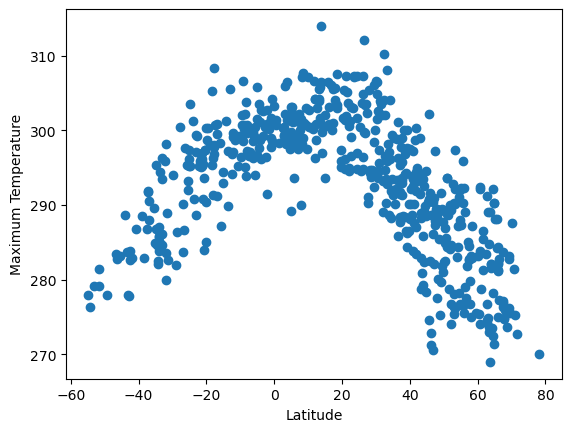

In [9]:
# Build scatter plot for latitude vs. temperature
lat_all = city_data_df["Lat"]
temp_all = city_data_df["Max Temp"]
plt.scatter(lat_all, temp_all)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

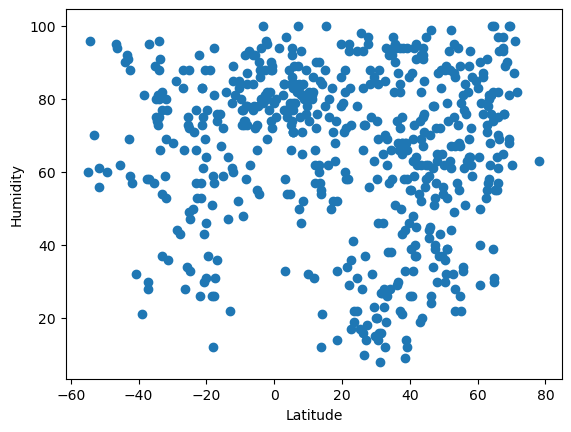

In [10]:
# Build the scatter plots for latitude vs. humidity
lat_all = city_data_df["Lat"]
humid_all = city_data_df["Humidity"]
plt.scatter(lat_all, humid_all)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

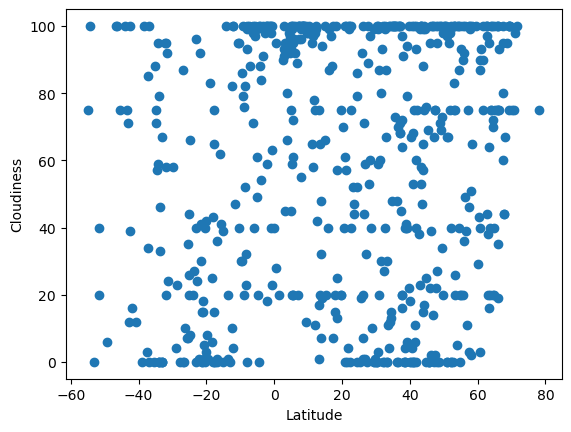

In [11]:
# Build the scatter plots for latitude vs. cloudiness
lat_all = city_data_df["Lat"]
cloud_all = city_data_df["Cloudiness"]
plt.scatter(lat_all, cloud_all)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

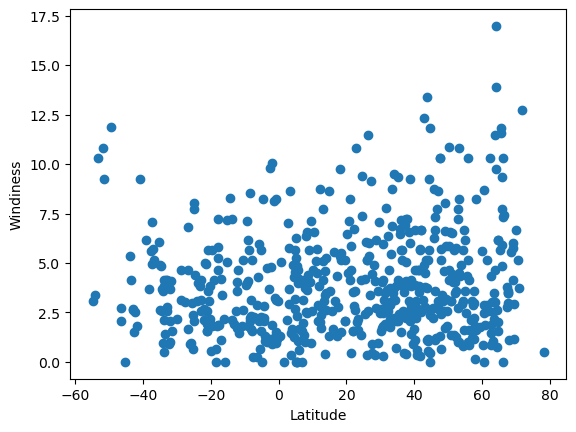

In [12]:
# Build the scatter plots for latitude vs. wind speed
lat_all = city_data_df["Lat"]
wind_all = city_data_df["Wind Speed"]
plt.scatter(lat_all, wind_all)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Windiness")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
url_side = "https://api.openweathermap.org/data/2.5/weather?id=524901&appid=477790e97a5434da7cc7e8149a3f45fc"
response2 = requests.get(url_side)
data2 = response2.json()
print(json.dumps(data2, indent=4, sort_keys=True))

In [ ]:
print(city_url_percent)

In [4]:
print(city_data)

[{'City': 'kruisfontein', 'Lat': -34.0033, 'Lng': 24.7314, 'Max Temp': 290.86, 'Humidity': 55, 'Cloudiness': 92, 'Wind Speed': {'speed': 0.85, 'deg': 189, 'gust': 1.89}, 'Country': 'ZA', 'Date': 1684502957}, {'City': 'chernyshevskiy', 'Lat': 63.0128, 'Lng': 112.4714, 'Max Temp': 277.56, 'Humidity': 63, 'Cloudiness': 44, 'Wind Speed': {'speed': 1.87, 'deg': 264, 'gust': 1.92}, 'Country': 'RU', 'Date': 1684502373}, {'City': 'hastings', 'Lat': 50.8552, 'Lng': 0.5729, 'Max Temp': 290.59, 'Humidity': 72, 'Cloudiness': 100, 'Wind Speed': {'speed': 4.95, 'deg': 48, 'gust': 6.66}, 'Country': 'GB', 'Date': 1684502939}, {'City': 'foz', 'Lat': 43.5692, 'Lng': -7.2544, 'Max Temp': 289.69, 'Humidity': 62, 'Cloudiness': 6, 'Wind Speed': {'speed': 5.35, 'deg': 35, 'gust': 7.34}, 'Country': 'ES', 'Date': 1684502958}, {'City': 'akureyri', 'Lat': 65.6835, 'Lng': -18.0878, 'Max Temp': 287.11, 'Humidity': 51, 'Cloudiness': 40, 'Wind Speed': {'speed': 8.23, 'deg': 200}, 'Country': 'IS', 'Date': 1684502958}

https://api.openweathermap.org/data/2.5/weather?q=london&appid=71865936485836c318464e967c0fb49a
